In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Airline Passenger Satisfaction\Dataset\train.csv')

In [3]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [4]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [6]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

### Imbalance check

##### Transform the satisfaction string category to numerical category for the imbalance check

In [7]:
df['satisfaction'] = df.satisfaction.apply(lambda x: int(1) if x == 'satisfied' else int(0))

In [8]:
print(df.satisfaction.value_counts()/len(df.satisfaction))

0    0.566667
1    0.433333
Name: satisfaction, dtype: float64


##### The data are balance enough, so the data doesn't need to be resampling

### Dealing with Null values

In [9]:
columns = [column for column in df.columns if df[column].isnull().sum() > 0]

In [10]:
print(df[columns].isnull().sum()/ len(df[columns]))

Arrival Delay in Minutes    0.002984
dtype: float64


array([[<AxesSubplot:title={'center':'Arrival Delay in Minutes'}>]],
      dtype=object)

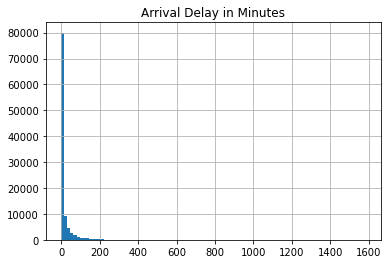

In [11]:
df[columns].hist(bins=100)

##### Inference - The distribution very right skewed thus causing the modulus of this columns is 0

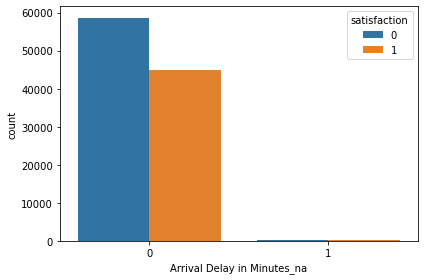

In [12]:
for col in columns:
    df[col + '_na'] = np.where(df[columns].isnull(), 1, 0)
    sns.countplot(col + '_na', data=df, hue='satisfaction' )
    plt.tight_layout()

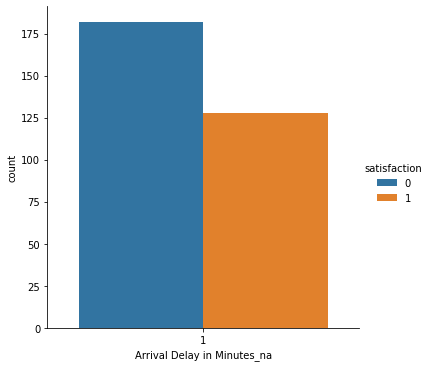

In [13]:
nan_data = df[(df['Arrival Delay in Minutes_na'] == 1)]
sns.catplot('Arrival Delay in Minutes_na', data=nan_data, kind='count', hue='satisfaction' )

In [14]:
df.drop('Arrival Delay in Minutes_na', axis=1, inplace=True)

In [15]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Numeric Columns Analysis

In [16]:
num_columns = [column for column in df.columns if df[column].dtypes != 'O']

##### Discrete Numeric Columns

In [17]:
num_columns_discrete = [column for column in num_columns if len(df[column].unique()) <= 10 and column not in ['satisfaction']]

In [18]:
for col in num_columns_discrete:
    modus_value = str(df[col].mode()[0])
    df[col] = df[col].astype(str).apply(lambda x: x.replace('0', modus_value))
    df[col] = df[col].astype(int)

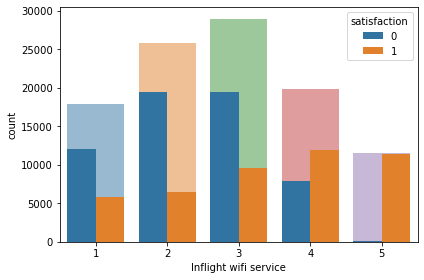

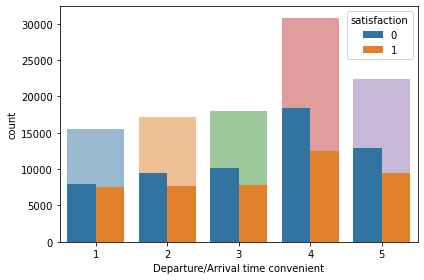

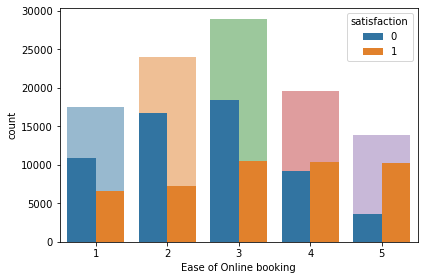

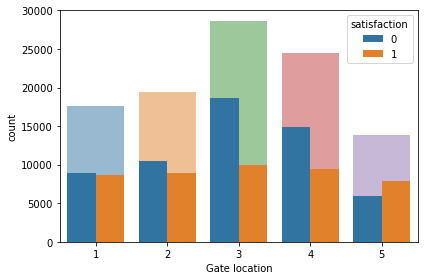

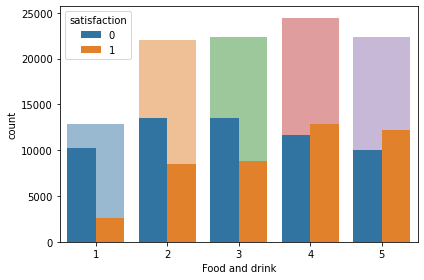

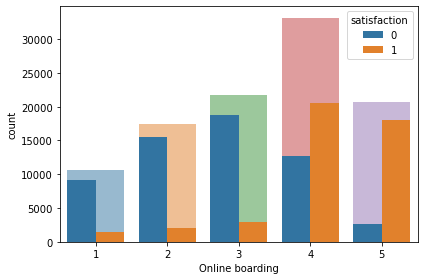

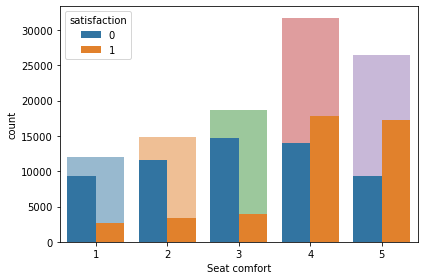

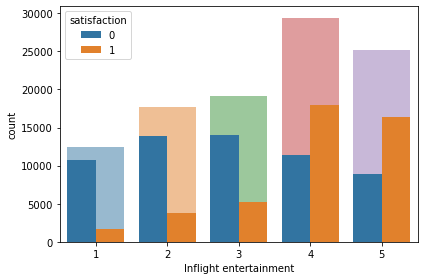

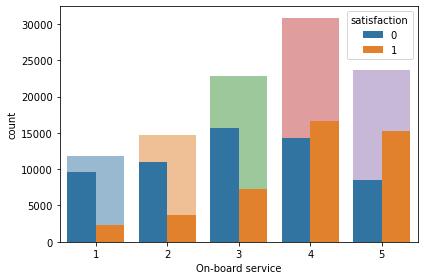

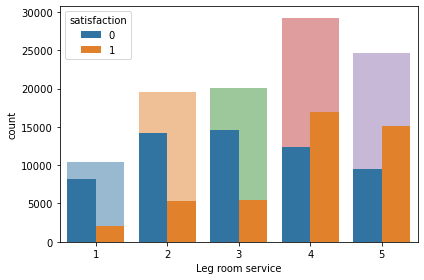

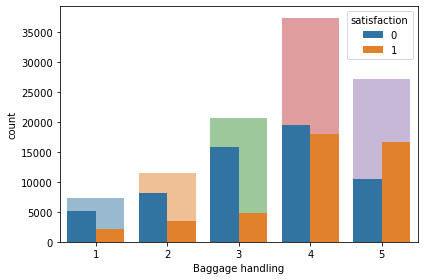

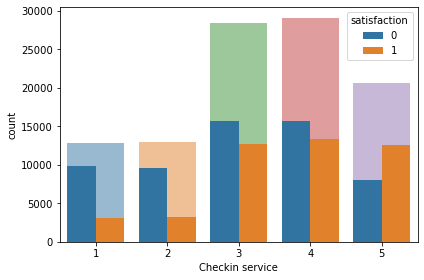

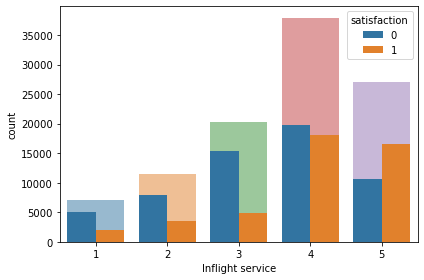

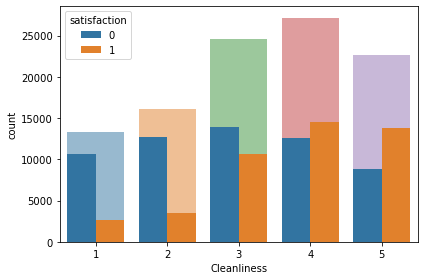

In [19]:
for col in num_columns_discrete:
    plt.figure()
    sns.countplot(col, data=df, alpha=0.5)
    sns.countplot(col, data=df, hue='satisfaction')
    plt.tight_layout()

**Inference**  
- Inflight wifi service most of the data are in 2 and 3 point and end up a lot dissatisfied. 
- It happens also in ease of online booking, gate location . 
- Departure/Arrival time are in good trends but not lead to the satisfaction of the airline. 
- Food and drink seems neutral and not impresive . 
- Online boarding, seat comfort, inflight entertaintment, on-board-service, leg room service, cleanliness are in the good shape   with the most of the data in point 4 and the trends lead to the satisfaction of the airline. 
- Baggage handling, checkin service and inflight service are slightly like departure/arrival time but still got a lot             satisfaction in point 5

### Continuous Numeric Columns

In [20]:
num_columns_continue = [column for column in num_columns if column not in num_columns_discrete and column not in ['satisfaction']] 

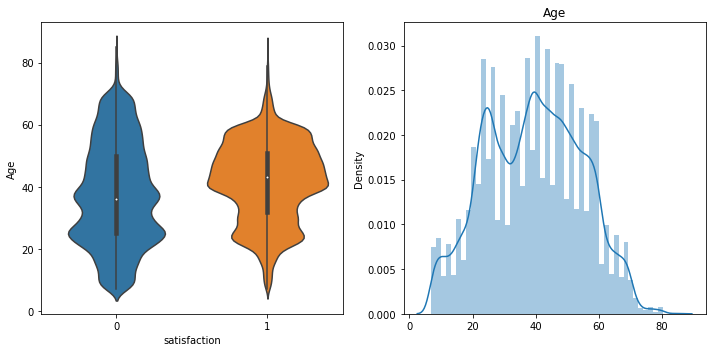

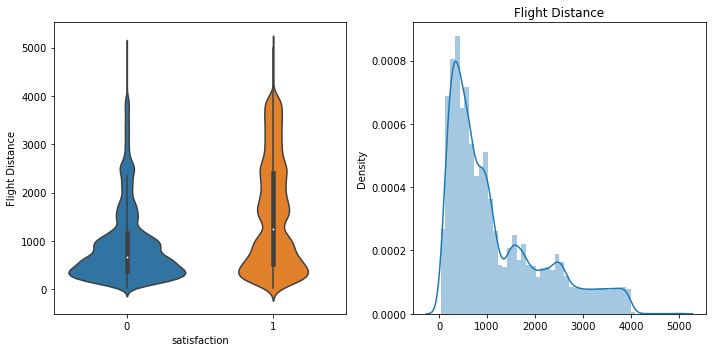

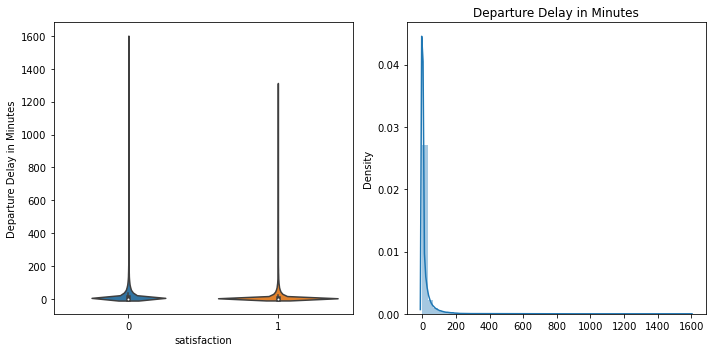

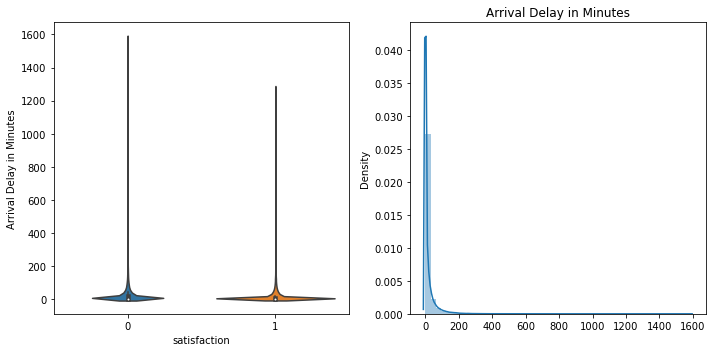

In [21]:
for col in num_columns_continue:
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    sns.violinplot(y=col, data=df, x='satisfaction', ax=axs[0])
    plt.title(col + ' and satisfaction')
    sns.distplot(x=df[col], ax=axs[1])
    plt.title(col)
    plt.tight_layout()

**Inference** 
- Age < 40 and age > 60 tend to not satisfied, while age range for 40 - 60 tend to be satisifed with the airlines. 
- In short range flight distance the passenger tend to be not satisfied while at the more long range tend to be satisfied. 
- In arrival and departure delay, the shorter delay tend to be satisfied the passenge.

### Categorical columns analysis

In [22]:
cat_columns = [column for column in df.columns if column not in num_columns]

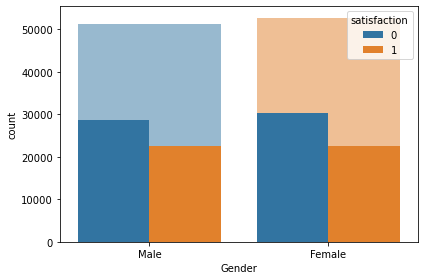

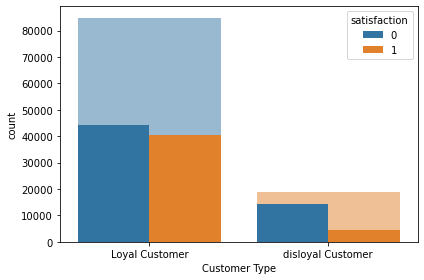

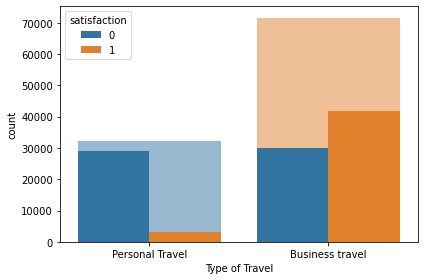

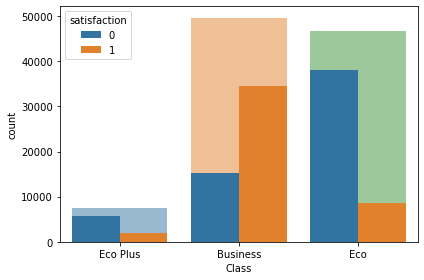

In [23]:
for col in cat_columns:
    plt.figure()
    sns.countplot(col, data=df, alpha=0.5)
    sns.countplot(col, data=df, hue='satisfaction')
    plt.tight_layout()

**Inference**
- For the gender and customer type, the data shows that they are less important for the overall satisfaction. 
- The passenger of business class and type shows that they are tend to be satisfied. 
- The eco class shows the worst percentage of the passenger to not to be satisfied with the airline.

### Check the correlation between columns in the data

In [24]:
print(num_columns_discrete)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [25]:
print(num_columns_continue)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [26]:
print(cat_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class']


#### Correlation with the age

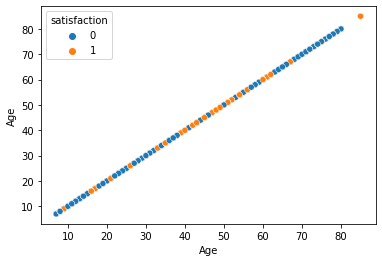

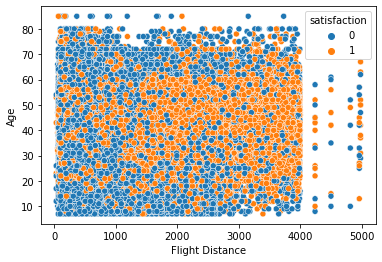

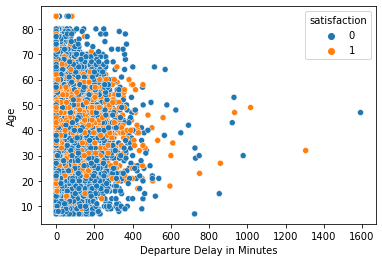

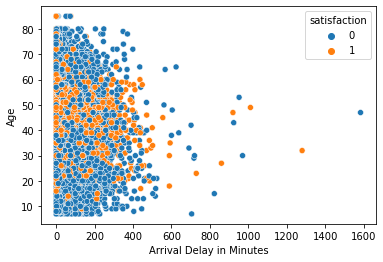

In [27]:
for col in num_columns_continue:
    plt.figure()
    sns.scatterplot(data=df, x=col, y='Age', hue='satisfaction')

**Inference** - No correlations found

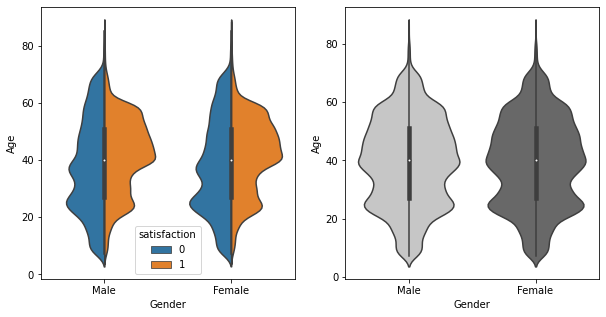

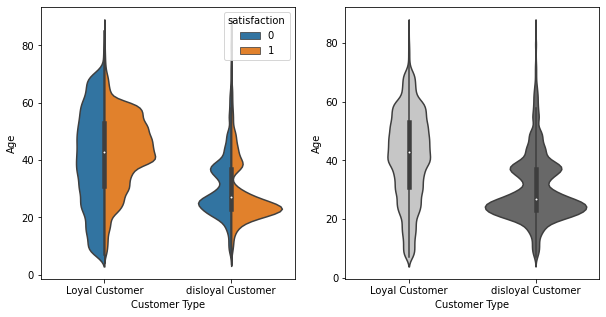

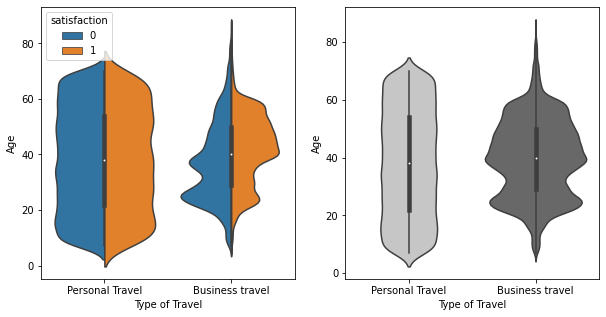

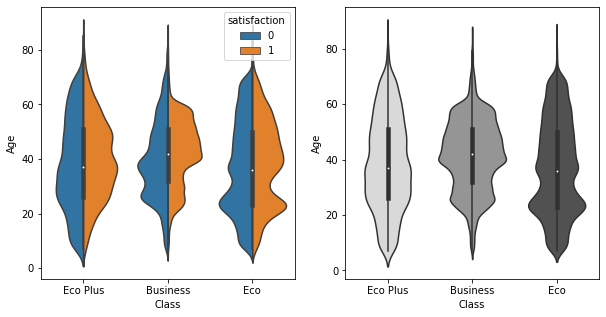

In [28]:
for col in cat_columns:
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    sns.violinplot(data=df, x=col, y='Age', hue='satisfaction', ax=axs[0], split=True)
    sns.violinplot(data=df, x=col, y='Age', ax=axs[1], palette='Greys')

**Inference**
- Gender for the age are completely the same, less important. the passenger with age > 40 tend to be loyal and satisfied with     the airline, while passenger with the younger age tend to be disloyal but satisfied with the airline.
- The passenger with age over 40 dominance the business travel type of travel and tend to be satisfied with the airline.
-  Eco plus and eco dominance by the younger passenger, < 20, with tend to be not satisfied, while bussiness class are dominance    by the older passenger, with age over 40 years and tend to be satisfied with the airline. 

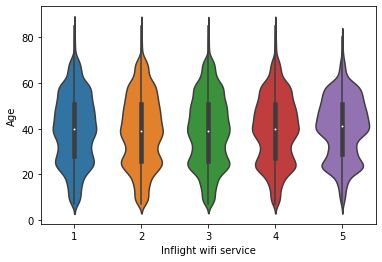

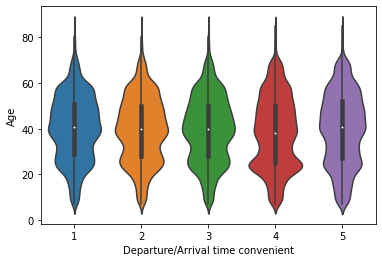

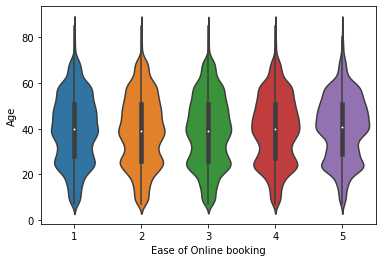

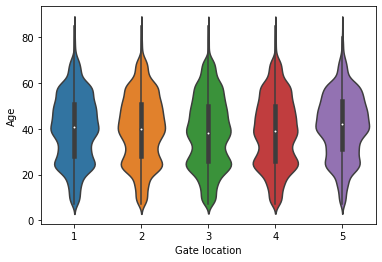

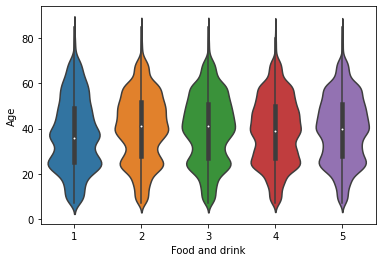

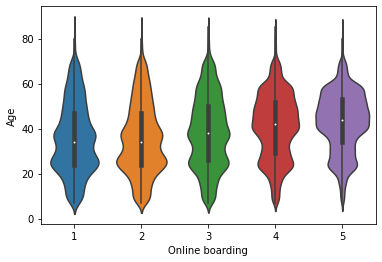

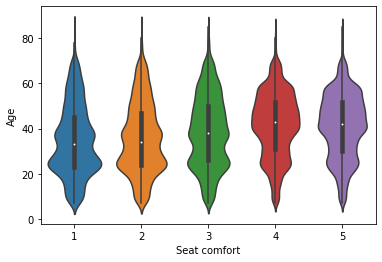

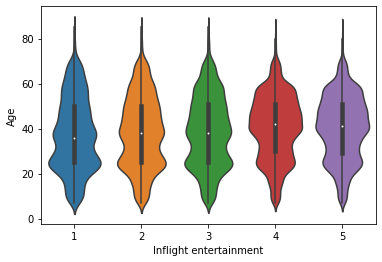

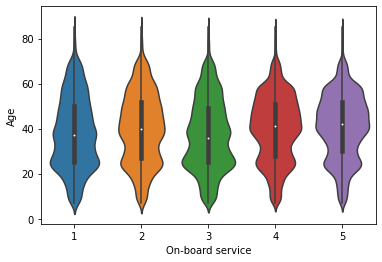

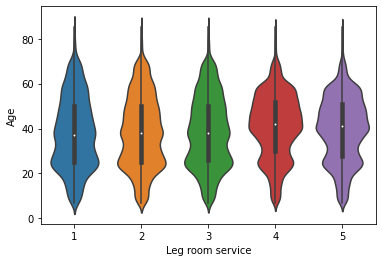

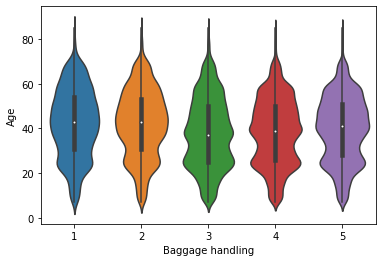

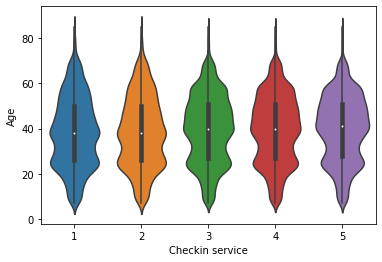

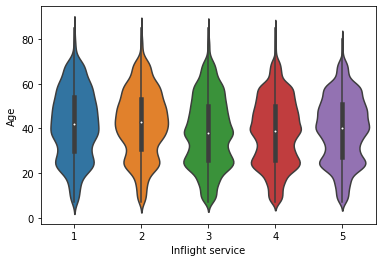

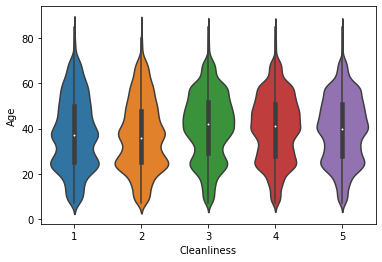

In [32]:
for col in num_columns_discrete:
    plt.figure()
    sns.violinplot(data=df, x=col, y='Age')

**Inference**
- Online boarding, seat comfort, inflight entertainment, on-board service, leg room service are dominant to provide the good service for older people, age 40 - 60.
- Baggage handling tend to be bad service for the older people

#### Correlation with the gender

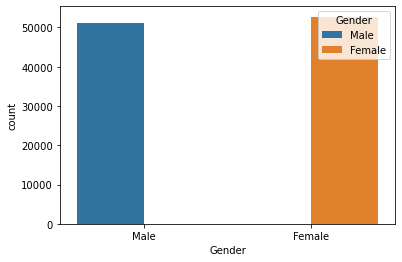

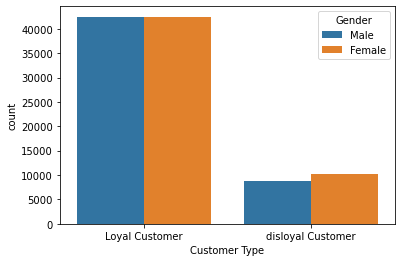

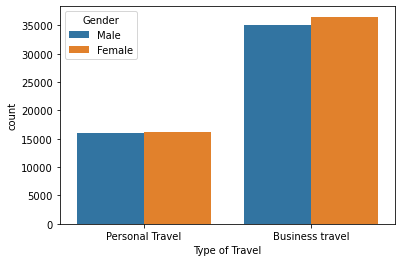

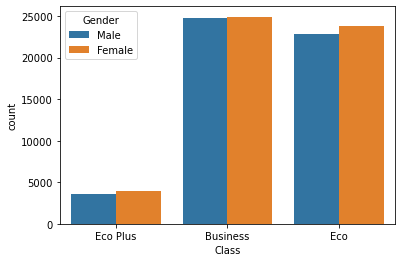

In [29]:
for col in cat_columns :
    plt.figure()
    sns.countplot(data=df, x=col, hue='Gender')

**Inference** - The gender seem balance, therefore gender is less essential for the another categorical columns

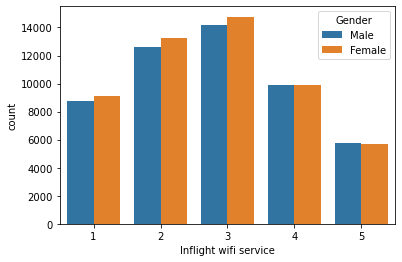

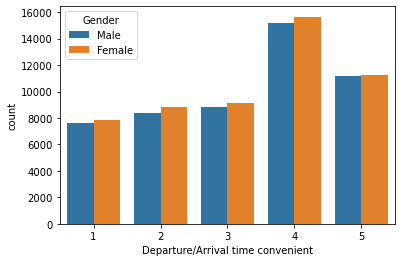

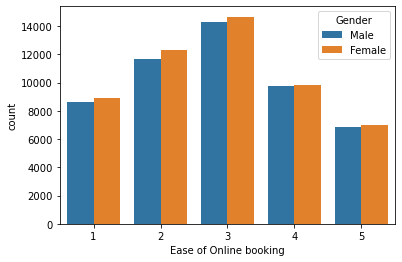

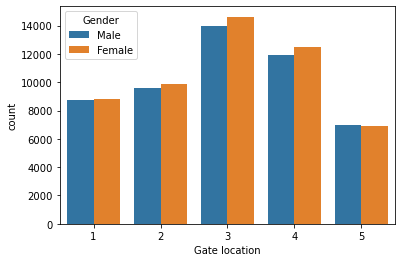

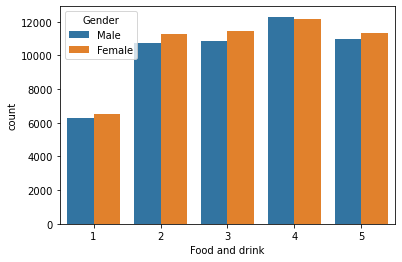

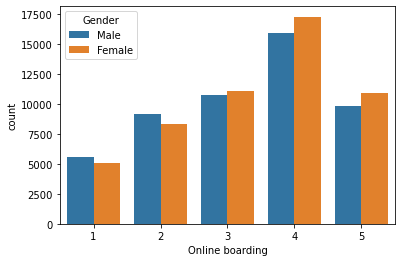

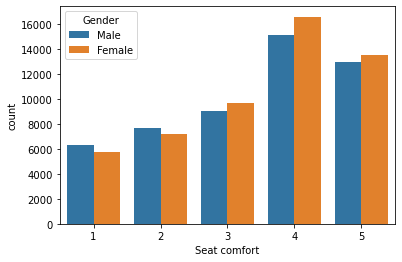

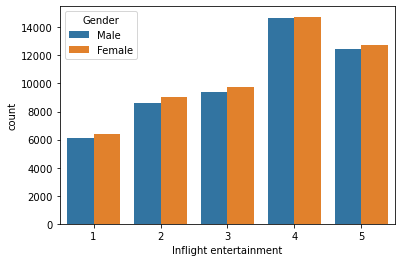

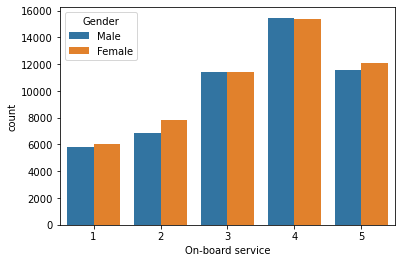

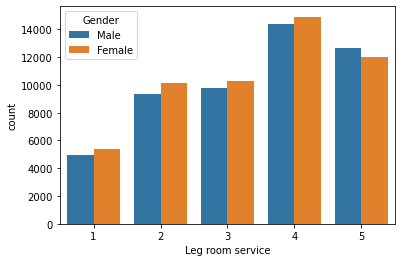

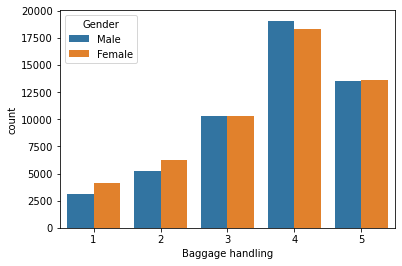

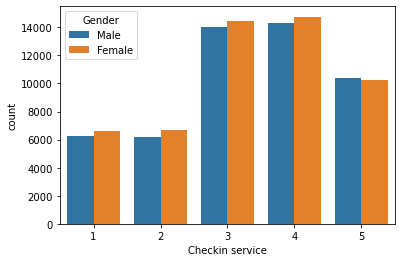

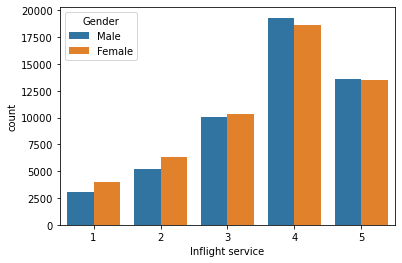

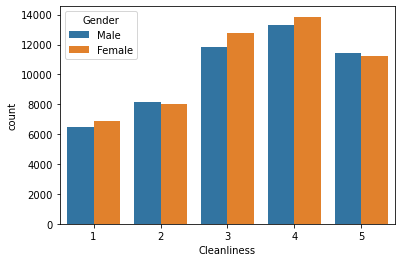

In [30]:
for col in num_columns_discrete:
    plt.figure()
    sns.countplot(data=df, x=col, hue='Gender')

**Inference** - Its also the same for the numerical discrete columns, which is the gender is the less important factor 

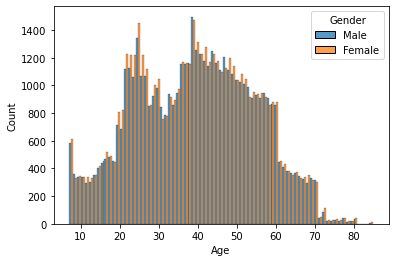

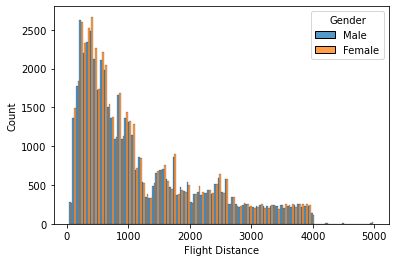

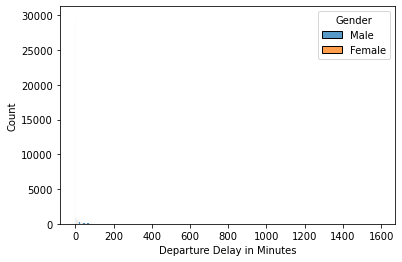

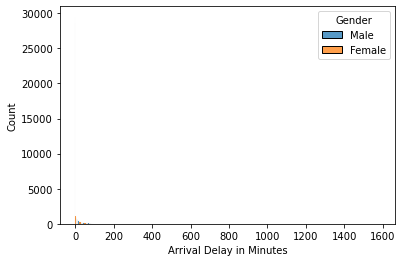

In [31]:
for col in num_columns_continue:
    plt.figure()
    sns.histplot(data=df, x=col, hue='Gender', multiple='dodge')

### Visualizing the 'Type of Travel' column

<AxesSubplot:xlabel='Class', ylabel='count'>

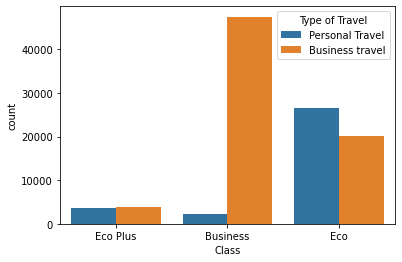

In [33]:
sns.countplot(data=df, x='Class', hue='Type of Travel')

<AxesSubplot:xlabel='Type of Travel', ylabel='Flight Distance'>

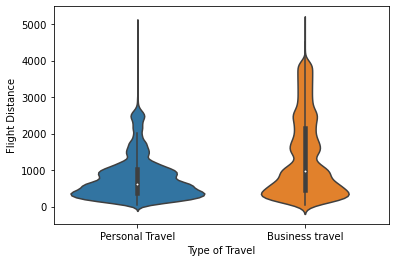

In [34]:
sns.violinplot(data=df, x='Type of Travel', y='Flight Distance')

<AxesSubplot:xlabel='Class', ylabel='Flight Distance'>

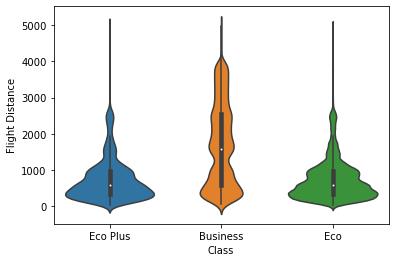

In [35]:
sns.violinplot(data=df, x='Class', y='Flight Distance')

**Inference** - Business class are dominant by the business type of travel with long range filght distance

#### Final Inference - The Airlines passenger satisfaction are dominanth by the older people within range of the age between 40 - 60 for the business travel using business class wihtin long flying range distance, which supported and reinforced by good services score for older people like seat comfort, on-board service and leg room.

## Data Preprocessing

### Dealing with Null values

In [37]:
for col in columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [38]:
for col in num_columns_discrete:
    modus_value = str(df[col].mode()[0])
    df[col] = df[col].astype(str).apply(lambda x: x.replace('0', modus_value))
    df[col] = df[col].astype(int)

### Using Log Transformation to transform the data to normally distributed data

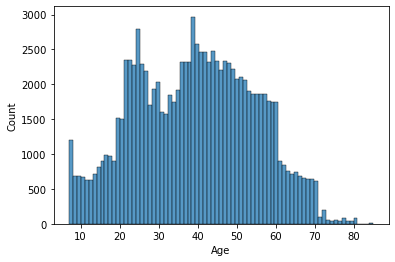

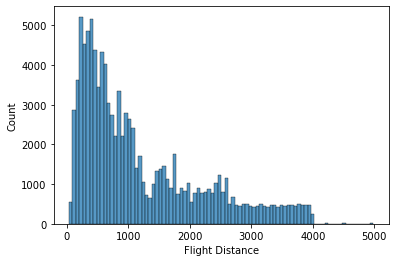

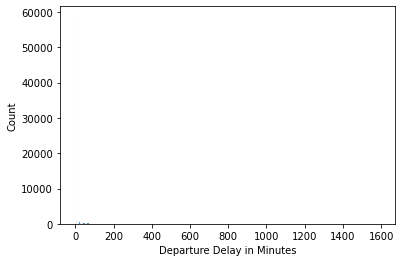

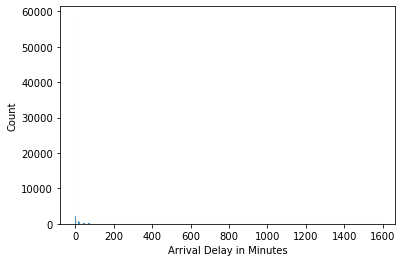

In [39]:
for col in num_columns_continue:
    plt.figure()
    sns.histplot(data=df, x=col)

**Inference** - The Flight Distance need to transform to get the more normally distributed. here Iam using two type of transform, and compare the transform result

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

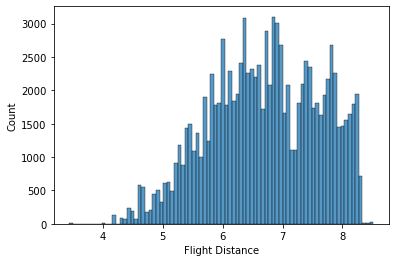

In [40]:
FD_log = np.log(df['Flight Distance'])
plt.figure()
sns.histplot(FD_log)

<AxesSubplot:ylabel='Count'>

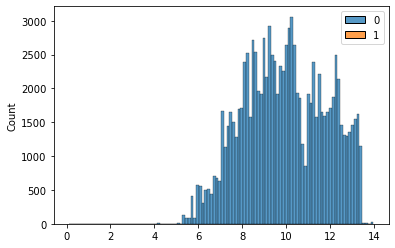

In [41]:
import scipy.stats as stats
FD_boxcox = stats.boxcox(df['Flight Distance'])
plt.figure()
sns.histplot(FD_boxcox)

**Inference** - From the result log transfrom give more normally distributed.

In [42]:
df['Flight Distance'] = FD_log

### Encode string categorical column into numeric using Indexing

In [43]:
def encode_category(data, column, target):
    ordinal_data= data.groupby([column])[target].sum().sort_values(by=column, ascending=False).index
    ordinal_num = {k: i for i, k in enumerate(ordinal_data, start=0)}
    data[column] = data[column].map(ordinal_num)
    print(ordinal_data)

In [44]:
for col in cat_columns:
    encode_category(df, col, ['satisfaction'])

Index(['Male', 'Female'], dtype='object', name='Gender')
Index(['disloyal Customer', 'Loyal Customer'], dtype='object', name='Customer Type')
Index(['Personal Travel', 'Business travel'], dtype='object', name='Type of Travel')
Index(['Eco Plus', 'Eco', 'Business'], dtype='object', name='Class')


### Feature Scaling using MinMax Scaler

In [45]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
columns_training = [column for column in df.columns if column not in ['satisfaction']]
df[columns_training] = sc_X.fit_transform(df[columns_training])

In [46]:
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

In [48]:
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

### Filter Methods

### Continuous Columns

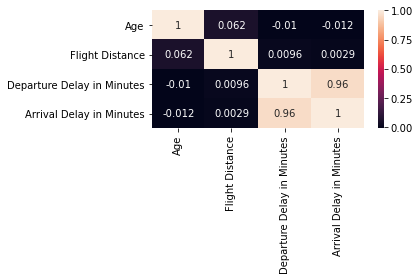

In [49]:
sns.heatmap(df[num_columns_continue].corr(), annot=True)
plt.tight_layout()

'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are too corelated for the correlation between independent features, so one of the features need to be drop

In [50]:
from sklearn.feature_selection import f_classif, SelectKBest
selector_cont = SelectKBest(score_func = f_classif, k=3)
selector_cont.fit(X[num_columns_continue], y)
pd.DataFrame({'Features':X[num_columns_continue].columns, 'F-Score':selector_cont.scores_, 'p-value':selector_cont.pvalues_})

,Features,F-Score,p-value
0,Age,1992.389117,0.000000e+00
1,Flight Distance,6920.836250,0.000000e+00
2,Departure Delay in Minutes,265.592493,1.229346e-59
3,Arrival Delay in Minutes,343.887980,1.208293e-76


In [51]:
cont_select = X[num_columns_continue].columns[selector_cont.get_support()].tolist()

### Categorical columns

In [52]:
categorical_columns = [column for column in X.columns if column not in num_columns_continue]

In [53]:
from sklearn.feature_selection import chi2
selector_cat = SelectKBest(score_func= chi2, k=15)
selector_cat.fit(X[categorical_columns], y)
pd.DataFrame({'Features':X[categorical_columns].columns, 'score':selector_cat.scores_, 'p-value':selector_cat.pvalues_})

,Features,score,p-value
0,Gender,7.631270,5.736489e-03
1,Customer Type,668.284630,2.358567e-147
2,Type of Travel,6501.443676,0.000000e+00
3,Class,2875.212380,0.000000e+00
4,Inflight wifi service,3281.670739,0.000000e+00
5,Departure/Arrival time convenient,43.169321,5.020169e-11
6,Ease of Online booking,1243.778719,1.866822e-272
7,Gate location,0.010747,9.174325e-01
8,Food and drink,919.103883,6.901033e-202
9,Online boarding,5473.560359,0.000000e+00


In [54]:
cat_select = X[categorical_columns].columns[selector_cat.get_support()].tolist()

In [55]:
selected_features = cont_select + cat_select

###  Splitting the data

In [56]:
y = df['satisfaction']
X = df[selected_features]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

## Comparative model Analysis

In [58]:
def model_selection(X_train, y_train, X_test, y_test, models):
    
    from sklearn.metrics import accuracy_score, precision_score
    
    accuracy_result = []
    precission_result = []
    str_models = []
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precission = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)       
        accuracy_result.append(accuracy)
        precission_result.append(precission)  
        str_models.append(str(model))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

    ax1.plot(accuracy_result)
    ax1.set_ylabel('accuracy_score')

    ax2.plot(str_models,precission_result)
    ax2.set_ylabel('precission_result')
    ax2.set_xticklabels(str_models, rotation=90)
    plt.tight_layout()
    
    return pd.DataFrame({'models':models, 'accuracy':accuracy_result, 'precission':precission_result}) 

In [59]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

,models,accuracy,precission
0,LogisticRegression(),0.885087,0.869842
1,RidgeClassifier(alpha=0.005),0.880083,0.860570
2,LinearSVC(),0.884991,0.870149
3,SVC(),0.943843,0.958689
4,KNeighborsClassifier(),0.931187,0.950513
5,RadiusNeighborsClassifier(),0.903662,0.929150
6,DecisionTreeClassifier(),0.936432,0.922373
7,"(DecisionTreeClassifier(max_features='auto', r...",0.957076,0.969825
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.909148,0.901179
9,MLPClassifier(),0.945479,0.946503


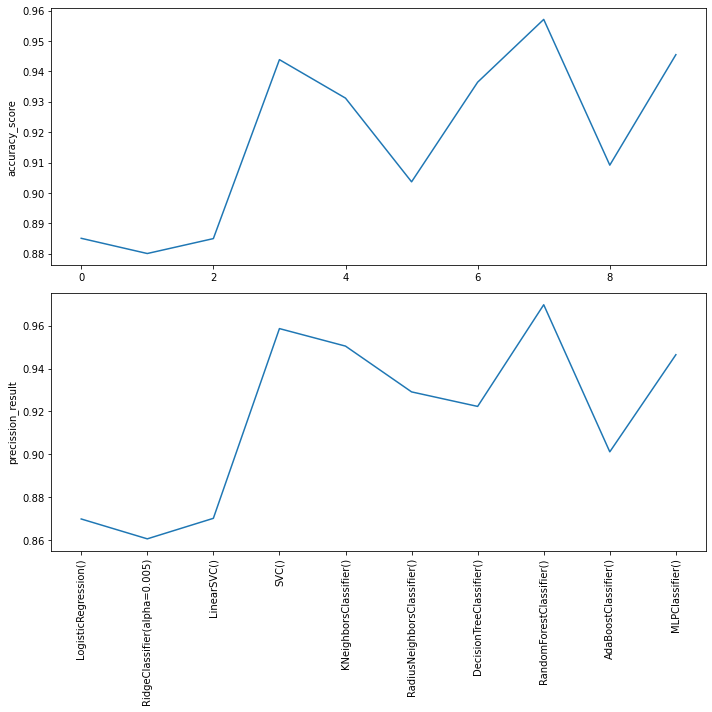

In [60]:
models = [LogisticRegression(), RidgeClassifier(alpha=0.005), LinearSVC(), SVC(), KNeighborsClassifier(),
          RadiusNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
          AdaBoostClassifier(), MLPClassifier()]
 
model_selection(X_train, y_train, X_test, y_test, models)

**Inference** - Since the Random Forest Classifier and SVC performs better than the other classifiers we will try hypertuning on them to increase their accuracy

## Random Forest Classifier

In [64]:
rf = RandomForestClassifier()

#### Confusion Matrix 

In [65]:
def confusion(X_train, y_train, X_test, y_test, model):
    from sklearn.metrics import confusion_matrix
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confu_score = confusion_matrix(y_pred, y_test, labels=[1,0])
    return pd.DataFrame(confu_score, columns=['Actual Postive', 'Actual Negative'], 
                        index=['Predicted Positive', 'Predicted Negative'])

In [66]:
confusion(X_train, y_train, X_test, y_test, rf)

,Actual Postive,Actual Negative
Predicted Positive,8252,252
Predicted Negative,643,11634


### ROC_AUC

In [67]:
def ROC_AUC_test(X_train, y_train, X_test, y_test, model):
    from sklearn.metrics import roc_auc_score, roc_curve
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)
    y_pred = y_pred[:,1]
    AUC = roc_auc_score(y_test, y_pred)
    tpr, fpr, _ = roc_curve(y_test, y_pred)
    print('AUC: ' + str(AUC))
    plt.plot(tpr, fpr)
    plt.title('ROC performance for ' + str(model))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

AUC: 0.9921894024713134


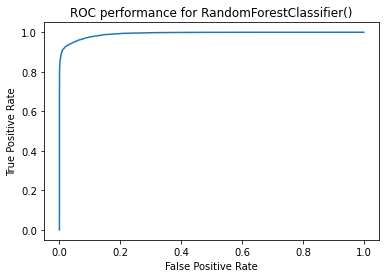

In [68]:
ROC_AUC_test(X_train, y_train, X_test, y_test, rf)

### Checking the amount of overfitting and underfitting occured in the model

In [69]:
def fit_check(model, kfolds):
    
    from sklearn.model_selection import KFold
    from sklearn.metrics import precision_score
    
    kf = KFold(n_splits=kfolds)
    list_training_error = []
    list_testing_error = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_train_data_pred = model.predict(X_train)
        y_test_data_pred = model.predict(X_test)
        fold_training_error = precision_score(y_train, y_train_data_pred)
        fold_testing_error = precision_score(y_test, y_test_data_pred)
        list_training_error.append(fold_training_error)
        list_testing_error.append(fold_testing_error)
    
    figsize=(5,5)
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label = 'training')
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label = 'testing')
    plt.xlabel('number of fold')
    plt.ylabel('Precision')
    plt.title('Precision across folds')
    plt.legend()
    plt.tight_layout()
    plt.show()

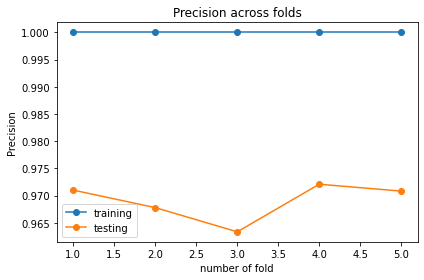

In [70]:
fit_check(rf, 5)

**Inference** - The overfit and underfit check showed that the model have an overfit indication cause the precision in training have better performance than precision in test set

### Hyperparameter using RandomizedsearchCV

In [71]:
def model_randomCV(X, y, model, parameters):
    
    from sklearn.model_selection import RandomizedSearchCV
    
    randCV = RandomizedSearchCV(estimator=model, scoring='precision', param_distributions=parameters, n_jobs=-1, cv=3)
    
    randCV.fit(X, y)
   
    print('best_parameters: ' + str(randCV.best_params_))
    print('best_score: ' + str(randCV.best_score_))
    print('best_estimator: ' + str(randCV.best_estimator_))    
    
    return pd.DataFrame(randCV.cv_results_).sort_values(by='rank_test_score')

In [72]:
parameters = {'n_estimators': np.arange(290, 310, 5), 'max_features':['auto', 'sqrt', 'log2'], 'max_depth':np.arange(18,23, 1), 
             'min_samples_split':np.arange(3, 8, 1), 'criterion':['gini', 'entropy']}

model_randomCV(X_train, y_train, rf, parameters)

best_parameters: {'n_estimators': 295, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
best_score: 0.968727553990932
best_estimator: RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_split=4, n_estimators=295)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,36.156664,0.043596,2.355063,0.034571,295,4,log2,20,entropy,"{'n_estimators': 295, 'min_samples_split': 4, ...",0.968368,0.966914,0.970901,0.968728,0.001647,1
6,42.548242,0.804018,2.711565,0.035609,305,6,log2,22,entropy,"{'n_estimators': 305, 'min_samples_split': 6, ...",0.967865,0.966894,0.970363,0.968374,0.001461,2
4,39.710754,0.098431,2.442983,0.037556,300,6,sqrt,22,entropy,"{'n_estimators': 300, 'min_samples_split': 6, ...",0.968119,0.966348,0.970112,0.968193,0.001537,3
8,32.943778,0.164528,2.032897,0.205727,295,7,sqrt,20,entropy,"{'n_estimators': 295, 'min_samples_split': 7, ...",0.968539,0.965645,0.970309,0.968164,0.001922,4
7,40.537106,0.222175,2.545331,0.012108,295,3,auto,18,entropy,"{'n_estimators': 295, 'min_samples_split': 3, ...",0.968793,0.964998,0.968283,0.967358,0.001682,5
5,39.489370,1.050394,2.673885,0.093217,300,3,sqrt,20,gini,"{'n_estimators': 300, 'min_samples_split': 3, ...",0.967371,0.964860,0.968812,0.967014,0.001633,6
9,32.182716,0.211572,1.835425,0.078201,300,4,sqrt,21,gini,"{'n_estimators': 300, 'min_samples_split': 4, ...",0.966569,0.964802,0.968736,0.966702,0.001609,7
3,37.158313,0.232674,2.437072,0.042998,295,6,log2,20,gini,"{'n_estimators': 295, 'min_samples_split': 6, ...",0.966644,0.964633,0.967622,0.966299,0.001244,8
0,35.811921,0.063552,2.472081,0.010843,305,3,log2,18,gini,"{'n_estimators': 305, 'min_samples_split': 3, ...",0.966179,0.964188,0.968159,0.966175,0.001621,9
2,36.677680,1.041635,2.460116,0.031055,305,7,sqrt,21,gini,"{'n_estimators': 305, 'min_samples_split': 7, ...",0.966557,0.964013,0.967493,0.966021,0.001471,10


In [73]:
rf_random = RandomForestClassifier(criterion='entropy', max_depth=19, max_features='sqrt',
                       min_samples_split=3, n_estimators=295)

In [75]:
confusion(X_train, y_train, X_test, y_test, rf_random)

,Actual Postive,Actual Negative
Predicted Positive,8246,244
Predicted Negative,649,11642


AUC: 0.9925899568478777


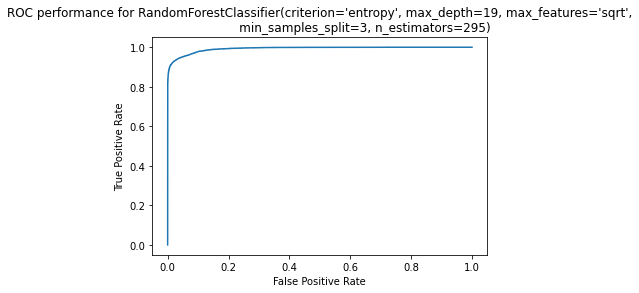

In [77]:
ROC_AUC_test(X_train, y_train, X_test, y_test, rf_random)

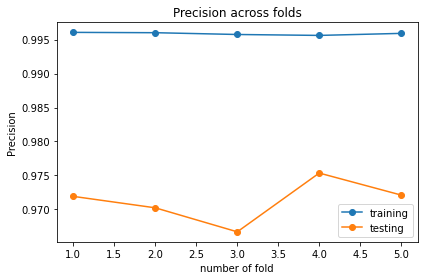

In [78]:
fit_check(rf_random, 5)

## Support Vector Classifier

In [79]:
svc = SVC()

In [80]:
confusion(X_train, y_train, X_test, y_test, svc)

,Actual Postive,Actual Negative
Predicted Positive,8076,348
Predicted Negative,819,11538


AUC: 0.9824920830709805


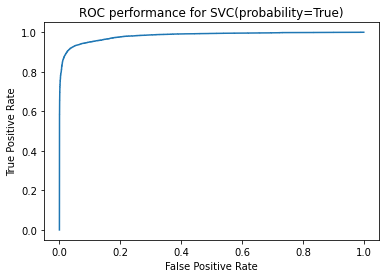

In [81]:
svc_prob_true = SVC(probability=True)

ROC_AUC_test(X_train, y_train, X_test, y_test, svc_prob_true)

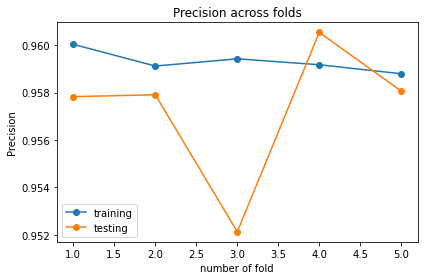

In [82]:
fit_check(svc, 5)

**Inference** - The SVC's performance(precision and ROC_AUC) is no better than Random Forest, but the fitiing perform better than Random Forest

#### Tweaking the parameters of Support Vector Machine

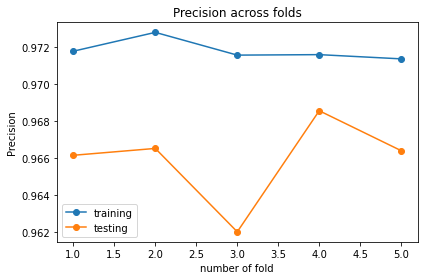

In [83]:
svc_hyp = SVC(C=10)

fit_check(svc_hyp, 5)

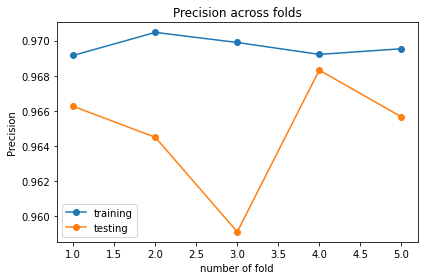

In [84]:
svc_hyp_1 = SVC(gamma=1)

fit_check(svc_hyp_1, 5)

### Drawing up the conclusion

In [85]:
def conclusion(X_train, y_train, X_test, y_test, models):
    
    from sklearn.metrics import precision_score
    
    train_result = []
    test_result = []
    str_models = []
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred = model.predict(X_test)
        precision_train = precision_score(y_train, y_pred_train)
        precision_test = precision_score(y_test, y_pred)       
        train_result.append(precision_train)
        test_result.append(precision_test)  
        str_models.append(str(model))
    
    figsize=(10,10)

    sns.lineplot(str_models, train_result, label='train')
    sns.lineplot(str_models, test_result, label='test')
    plt.ylabel('Precision')
    plt.title('Precision for models')
    plt.xticks(str_models, rotation=90)
    plt.legend()
    plt.tight_layout()
    
    return pd.DataFrame({'models':models, 'precision_train':train_result, 'precission_test':test_result}) 

,models,precision_train,precission_test
0,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.970488
1,SVC(),0.960153,0.958689
2,"(DecisionTreeClassifier(criterion='entropy', m...",0.995865,0.971519
3,SVC(C=10),0.971735,0.965722
4,SVC(gamma=1),0.969547,0.964829


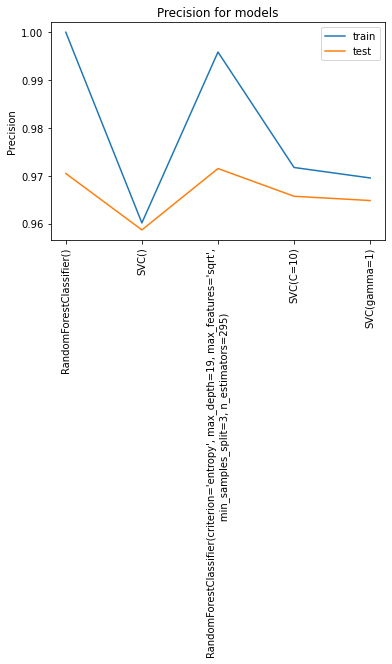

In [86]:
rf = RandomForestClassifier()
svc = SVC()
rf_best = RandomForestClassifier(criterion='entropy', max_depth=19, max_features='sqrt', min_samples_split=3, n_estimators=295)
svc_hype = SVC(C=10)
svc_hype_1 = SVC(gamma=1)
models = [rf, svc, rf_best, svc_hype, svc_hype_1]

conclusion(X_train, y_train, X_test, y_test, models)

## Now we are going to save the best models 

In [87]:
import  pickle

In [88]:
file = open(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Airline Passenger Satisfaction\Model/hypertuned_rf.pkl','wb')

pickle.dump(rf_best, file)

In [90]:
file = open(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Airline Passenger Satisfaction\Model/hypertuned_svc.pkl','wb')

pickle.dump(svc_hype, file)